# Question 1 : Logistic Regression


## Import functions and data

In [1]:
# run this cell to import nltk
import numpy as np
import pandas as pd
import nltk
from os import getcwd
import re
import string

### Imported functions

Download the data needed for this assignment. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).

* twitter_samples and stopwords: While running on a local computer you need to download them using
```Python
nltk.download('twitter_samples')
nltk.download('stopwords')
```

#### Import some helper functions that we provided in the utils.py file:
* `clean_tweet()`: cleans, tokenizes, removes stopwords, and converts words to stems.
* `build_frequency()`: this counts how often a word in the the entire set dataset of tweets was associated with a positive label '1' or a negative label '0', then builds the `frequency_words` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.
* The `frequency_words` dictionary is the frequency dictionary that's being built. 

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to C:\Users\Mohammed
[nltk_data]     Wasif\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Wasif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# this code allows us to prevent downloading data again while refreshing our workspace
filePath = f"{getcwd()}/../temp/"
nltk.data.path.append(filePath)

In [4]:
print(filePath)

F:\Text Books\Business Analytics\DS226 Computational Thinking for AI and ML\Assignment 3/../temp/


### Data processing
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.  

In [5]:

from nltk.corpus import twitter_samples 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer



In [6]:





def clean_tweet(tweet):
    
    # tweets_clean: a list of words containing the processed tweet
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market symbols like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
#     #removing emojis                                                 #uncomment this block of code to remove smilies
#     tweet = re.sub(r':\)','', tweet)
#     tweet = re.sub(r':\(','',tweet)
#     tweet = re.sub(r':-\)','',tweet)
#     tweet = re.sub(r':-\(','',tweet)
#     tweet = re.sub(r':d','',tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and  
                word not in stopwords_english): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_frequency(tweets, y_np):
 
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(y_np).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for i in range(len(tweets)):
        tweet = tweets[i]
        y = yslist[i]
        for word in clean_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [7]:
# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [8]:
print(positive_tweets[7])
print(negative_tweets[10])

@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
I have a really good m&amp;g idea but I'm never going to meet them :(((


### Feature Extraction

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
    * For each word, check the `frequency_words` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

In [9]:
def extract_features(tweet, freqs):
    
    # clean_tweet tokenizes, stems, and removes stopwords
    word_l = clean_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    
    for word in word_l:
        
        # increment the word count when the  label is positive 
        x[0,1] = x[0,1] + freqs.get((word, 1.0),0)
        # increment the word count when the  label is negative 
        x[0,2] = x[0,2] + freqs.get((word, 0.0),0)
    return x

#### Instructions: Write `sigmoid`
Finds the sigmoid of z 

In [10]:
def sigmoid(z): 
    
    # z is an input which can be a scalar or an array and h is the sigmoid of z 
    # write the formula for sigmoid here and assign it to h
    h = 0
    h=1/(1+np.exp(-1*z))
    return h

#### Instructions: Write `predict_positivity_score`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the y.
* Apply the sigmoid to the y to get the prediction (a value between 0 and 1).


In [11]:
def predict_positivity_score(tweet, freqs, theta):
    
    
    # extracting features from tweet and the frequencies, this x will multiply with the coefficients which are passed to the 
    # sigmoid
    x = np.array(extract_features(tweet,freqs))
    y_pred = 0
    y_pred=np.dot(x,theta)
    # make the prediction using x and theta
    # you need to make calculations for y_pred here. You may need to call sigmoid function here
    
    return y_pred

Note that the `frequency_words` dictionary should be based on the training data and training labels. Here we have done this for a few number of data points


The given function `clean_tweet()` makes tokens from words and applies stemming (producing some variant of a root/base word) and removes stop words (commonly used words such as "the" ,"a" ,"an" among other words)

In [12]:
#IMPLEMENT gradient descient here. 
# alpha is the learning rate 
# x is the data and y is hte label 
# theta is the initial parameter values 
# num_iters is the number of iterations you want the algorithm to run
def gradientDescent(x, y, theta, alpha, num_iters):
    list_of_loss_values=[]
    list_of_training_accuracy=[]
    misclassified=[]
    for i in range(num_iters):
        #     xi=np.array(x)
        #     yi=np.array(y)
        h=sigmoid(np.dot(x,theta))
        gradients=(np.dot(x.T,(h-y)))/7500
        theta=theta-alpha*gradients
        k=-1*(np.dot(y.T,np.log(h))+np.dot((np.ones((7500,1))-y).T,np.log(np.ones((7500,1))-h)))/7500
        correctcount=0
        for i in range(len(x)):
            if h[i]>=0.5 and y[i]==1:
                correctcount=correctcount+1
            elif h[i]<0.5 and y[i]==0:
                correctcount=correctcount+1
            else:
                misclassified.append(i)
        accuracy=correctcount/len(x)
        list_of_training_accuracy.append(accuracy)
        list_of_loss_values.append(k)
    J=k
        #     list_of_training_accuracy.append(g)
        # list_of_loss_values is the loss for each iteration which , same is the case with training accuracy
    return J, theta,list_of_loss_values,list_of_training_accuracy,misclassified

## Train test splitting of data

In [13]:
positive_train=positive_tweets[0:3750]
negative_train=negative_tweets[0:3750]
positive_test=positive_tweets[3750:5000]
negative_test=negative_tweets[3750:5000]
labels=np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
freqs=build_frequency(positive_train+negative_train,labels)
tweeties=positive_train+negative_train
test_x=positive_test+negative_test
test_y=np.append(np.ones((len(positive_test),1)),np.zeros((len(negative_test),1)),axis=0)
print(labels.shape)

(7500, 1)


In [14]:
labels=np.array(labels)
print(labels.shape,type(labels))
p=labels

(7500, 1) <class 'numpy.ndarray'>


In [15]:
X=np.zeros((len(positive_train+negative_train),3))
for i in range(len(positive_train+negative_train)):
    X[i,:]=extract_features(tweeties[i],freqs)
Y=labels
theta=np.zeros((3,1))


## Scatter Plot of 'positive words' vs 'negative words'

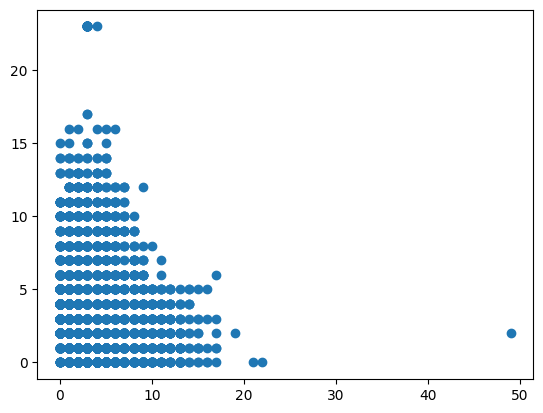

In [16]:
# x_list=X[:,1]
# y_list=X[:,2]
# from matplotlib import pyplot as plt
# plt.scatter(x_list,y_list)
# plt.show()
po=[]
ne=[]
for i in tweeties:
    words=clean_tweet(i)
    posword=0
    negword=0
    for k in words:
        if freqs.get((k, 1.0),0)>=freqs.get((k, 0.0),0):
            posword=posword+1
        else:
            negword=negword+1
    po.append(posword)
    ne.append(negword)
# x_list=X[:,1]
# y_list=X[:,2]
from matplotlib import pyplot as plt
plt.scatter(po,ne)
plt.show()

This scatter plot shows us that as the number of positive words increases in a tweet the number of negative words decrease. Thus they are having a negative correlation.

## Implementing Gradient descent

In [17]:
l=gradientDescent(X,Y,theta,1e-9,1268)

In [18]:
noofiter=1268

In [19]:
#Some examples of misclassified tweets    
for i in l[4][:100]:
    print(tweeties[i])

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(
oh god, my babies' faces :( https://t.co/9fcwGvaki0
@RileyMcDonough make me smile :((
@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln
why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"
Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz
I have a really good m&amp;g idea but I'm never going to meet them :(((
@Rampageinthebox mare ivan :(
@SophiaMascardo happy trip, keep safe. see you soon :* :(
I'm so tired hahahah :(
@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch.
relate to the "sweet n' sour" kind of "bi-polar" people 

## Loss as a function of number of iterations

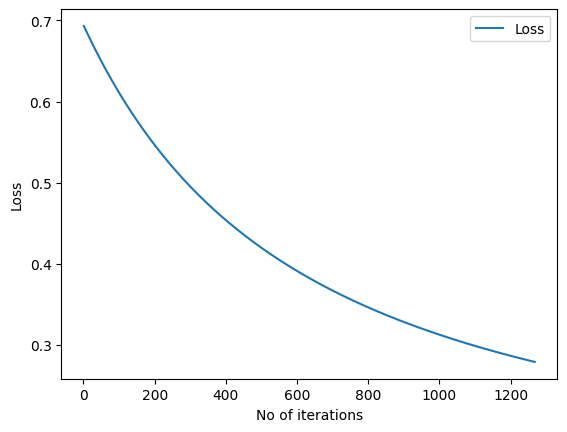

In [20]:
x1=np.linspace(1,noofiter,noofiter)
y1=np.ravel(l[2])
y2=l[3]
from matplotlib import pyplot as plt
plt.plot(x1,y1,label='Loss')
plt.xlabel('No of iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuracy as a function of number of iterations

1267


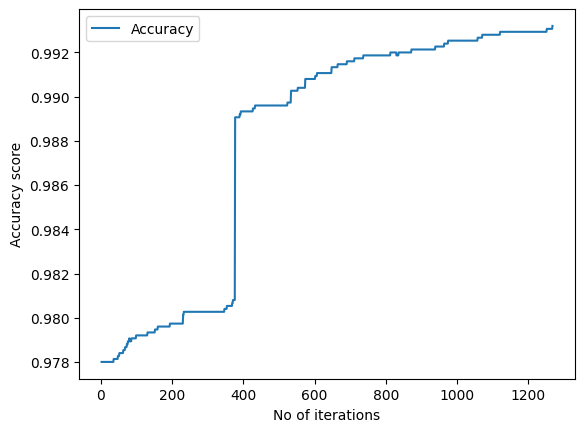

In [21]:
plt.plot(x1[1:],y2[1:],label='Accuracy')
plt.xlabel('No of iterations')
plt.ylabel('Accuracy score')
plt.legend()
print(y2.index(max(y2)))

## Training Accuracy at the end 

In [22]:

print('Training accuracy at end of training', y2[-1])

Training accuracy at end of training 0.9932


* Train test split: 25% will be in the test set, and 75% in the training set.

# Example
 # Here we show how to call these methods for a few data points. You  may have to use similar calls to the training data after you make the test train split.

In [23]:
some_number_of_tweets = positive_tweets[0:10] + negative_tweets[0:10]
some_number_of_labels = np.append(np.ones((len(positive_tweets[0:10]), 1)), np.zeros((len(negative_tweets[0:10]), 1)), axis=0)

In [24]:
frequency_words = build_frequency(some_number_of_tweets, some_number_of_labels)

In [25]:

# Random tests, you can remove these if you want later , but it may help in testing the code 
print(extract_features(some_number_of_tweets[6], freqs))
# test 2:
# check for when the words are not in the frequency_words dictionary
print(extract_features('lalalalala blahblahblah bobobobobbob', freqs))



[[1.000e+00 3.691e+03 5.000e+02]]
[[1. 0. 0.]]


In [26]:
# NOTE : call gradient descent to get coefficents and then pass that coefficents into predict function 
# something like : predict_positivity_score(tweet, frequency_words, coefficents)

## Testing your model
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

#### Implement `test_logistic` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* Use your `predict_positivity_score()` function to make predictions on each tweet in the test set.
* If the prediction is >= 0.5, set the model's the predicted label is 1 otherwise it is 0.  


In [27]:
# Testing your model on the test set
def test_logistic(test_x, test_y, freqs, theta):
    
    #use your trained model to make predictions and then compare those predictions with the 
    # actual values to come up with an accuracy. and return this accuracy
    miscorrect=[]
    countcorrect=0
    for i in range(len(test_x)):
        h=sigmoid(predict_positivity_score(test_x[i],freqs,theta))
        if h>=0.5 and test_y[i]==1:
            countcorrect=countcorrect+1
        elif h<0.5 and test_y[i]==0:
            countcorrect=countcorrect+1
        else:
            miscorrect.append(i)
    accuracy = countcorrect/(len(test_x))
    return accuracy

## Testing accuracy at the end

In [28]:
acc= test_logistic(test_x,test_y,freqs,l[1])
print(acc)

0.992


## Scores of given sentences

In [29]:
# Use your model to predict what these result in, whether it is a positive or negative sentiment. If possible, feel free to give
# an intuitive explanation (short explanation) of the scores that you obtained

my_tweet = ['Let that sink in',
            'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ',
            'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.',
            'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.',
            'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing'
           ]



In [30]:
for i in enumerate(my_tweet):
    pred=predict_positivity_score(i[1],freqs,np.ravel(l[1]))
    hpred=sigmoid(pred)
    if hpred>=0.5:
        print(f'For the {i[0]}th tweet the score is {hpred} and is positive')
    if hpred<0.5:
        print(f'For the {i[0]}th tweet the score is {hpred} and is negative')

For the 0th tweet the score is [0.50267084] and is positive
For the 1th tweet the score is [0.48095172] and is negative
For the 2th tweet the score is [0.49887223] and is negative
For the 3th tweet the score is [0.49907237] and is negative
For the 4th tweet the score is [0.50307951] and is positive


## Limitations of the model and ways to improve it.

### Limitiations:
<li>The model is limited by the amount of data available to it.
<li>This model predicts the scores of tweets close to 0.5 thus giving room for error.
<li>The dictionary built was based on a single criteria of what kind of tweet it is in, thus decreasing the complexity of the input.
<li>This model is based on static data and could become completely wrong when implemented on future tweets i.e., after few years.
    
### Ways to improve it:
<li>Provide more data.
<li>This model doesnt have a neutral label which would make this model more relevant.
<li>The dictionary could be built using more than one criteria or by using other machine learning models.
<li>We would need to continously input new data to train the model

## Change of results on removing the smily symbols
#### (Note: Uncomment the #removing emojis code in clean_tweet definition and run the book to get graphs ans accuracies mentioned for model trained with no smilies)

<li>When smily symbols were removed the training accuracy of the model fell from 0.9932 to 0.6247 and testing accuracy of the model fell from 0.992 to 0.604.
<li>The number of iterations required to come to the max accuracy was higher incase of nosmily model i.e., approximately 1851 where as the model which was trained with smilies reached max accuracy in 1268 iterations.
<li>The graph of loss as a function of number of iterations in case of model trained by removing the smilies is linear when compared to the model trained with smilies which was exponentially decreasing. Thus the loss function decreased more rapidy in case of model having smileys.
<blockquote>Intutive explanation for this would be that people tend to use different smileys in different situations i.e., smiling emoticons will mostly be used for positive tweets and frowning emoticons will be used for negative tweets. Thus the weights of these emoticons would be very high in a model. Thus allowing the model to be more accurate in preicting the sentiment of the tweet given to it.
When the emoticons are removed, model has to base its prediction only on words which can be used both in positive and negative situations. Thus the accuracy of the model being low.

## Accuracy as a function of no of iterations for model trained without smilies

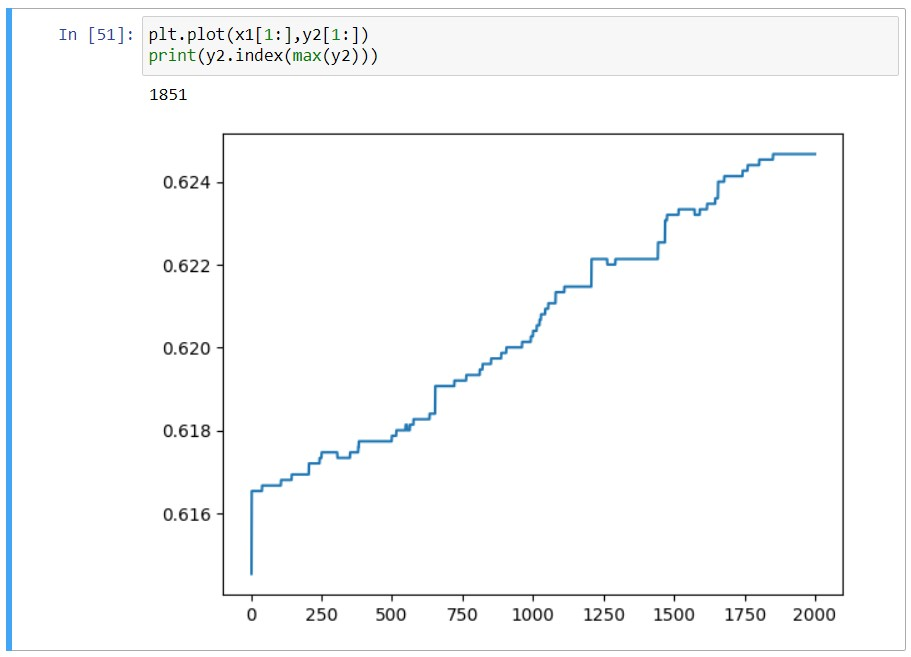

## Loss as a function of no of iterations for model trained without smilies

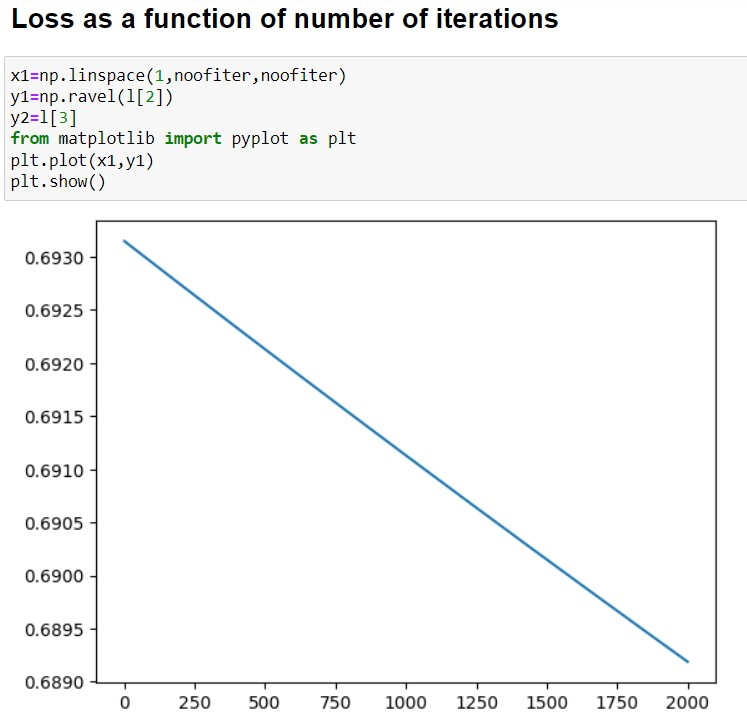